# EBAC 
## Módulo 22: Combinação de modelos
### Tarefa 02

1. Monte um passo a passo para o algoritmo RF<br>
2. Explique com suas palavras o Randomforest<br>
3. Qual a diferença entre Bagginge RandomForest?<br>
4. (Opcional) Implementar em python o RandomForest:<br>
        – Bootstrap<br>
        – Featureselection<br>
        – Modelagem com Decisiontrees<br>
        – Agregação

#### A RandomForest

A RandomForest é uma ferramenta para desenvolvimento de predições de dados utilizando árvores de classificação ou regressão. Apartir da divisão, das linhas e colunas da base de dados espera-se determinar modelos diferentes de árvores não apenas utilizando diferentes entradas de dados mas, também, alterando as variáveis recebidas.

#### Passo a passo
Para desenvolvimento de uma RandomForest precisamos:<br>
  1. Receber e tratar os dados da base<br> 
  2. Separar a base de dados dada em partes de igual quantidade de linhas e colunas, podendo repetí-las e alterar a ordem de aparição. Para alterar o tamanho horizontal da base deve ser igual a: <br>
        - raíz quadrada do tamanho horizontal da base original, para árvores de classificação;<br>
        - um terço do tamanho da base orinal para árvores de regressão. <br>
  3. Desenvolver a árvore que se qualifique melhor para essas bases. Em caso de resultados categorizados utiliza-se árvores categhorização, e em caso de resultados específicos árvore de regressão.<br>
  4. Aplicar a árvore para previsões.<br>
  5. Receber os resultados dessas previsões.<br>
  6. Escolher entre os resultados previstos aquele que ter maior probabilidade de ocorrer. Em caso de resultados categorizados  escolher o resultado mais frequênte, em caso de resultados específicos a média entre os obtidos.

#### Exemplos
Podemos exemplificar a utilização do RandomForest com os seguintes itens: <br>
  - Classificação de flores de acordo com as caracteríticas apresentadas, como altura, cor, caule, entre outros.<br>
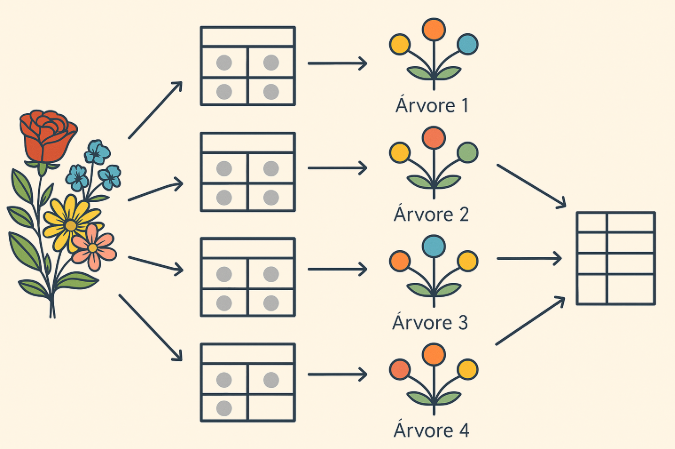<br>

Em uma base de dados anoto características distintas (como cor, caule, características das pétolas, etc) de flores diversas. Divido as linhas e colunas dessa base de dados aleatoriamente em outras com mesmo número de linhas e colunas iguais a raíz quadrada do número de colunas da base original, podendo repetir informações. <br>
Com essas bases, construo árvores de classificação com o objetivo de analisar e prever a tipologia da flor apartir de suas caracteríticas.<br>
A partir das previsões geradas por cada árvore sobre a tipologia provável, reúno os resultados em uma tabela. Nela, registro as opções e suas respectivas frequências de ocorrência, tomando como resposta final aquela que aparecer com maior frequência — ou seja, a maioria das previsões.

  - Previsão de quantos produtos devem ser comprados por uma loja considerando as vendas nos períodos anteriores, cotação do dólar, novos lançamentos, variação do preço, entre outros aspectos<br>
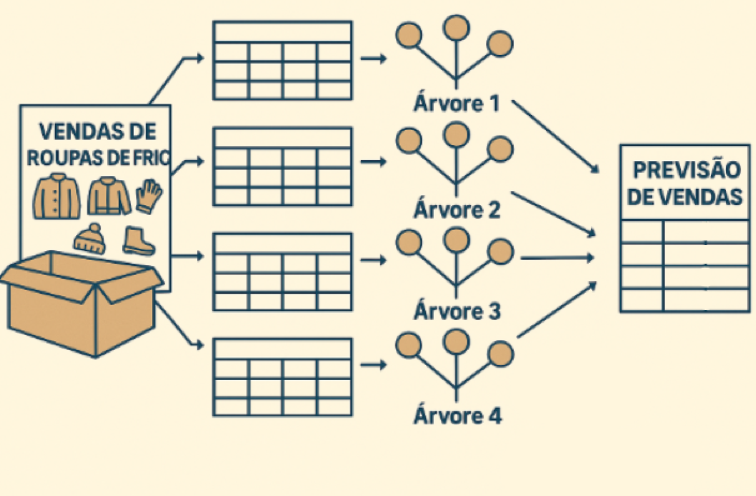<br>

Com base no histórico de vendas de um determinado produto, cotação do dólar, novos lançamentos, variação do preços, entre outros aspectos, crio uma base de dados principal.<br> 
A partir dessa crio várias amostras aleatórias dos dados disponíveis, reduzindo o número de linhas e o número de colunas (sendo esse um terço do número de colunas original), permitindo repetições (bootstrapping). <br>
Para cada amostra, desenvolvo um modelo de previsão que estima quantas unidades do produto devem ser compradas para o estoque futuro.<br>
Após gerar essas previsões com diferentes modelos, reúno os resultados e calculo a média das quantidades sugeridas. Essa média representa a estimativa final mais robusta, pois combina os aprendizados de múltiplas versões do modelo, reduzindo a influência de variações ou ruídos em uma única amostra.

#### Diferença entre RandomForest e Bagging
Podemos dividir as diferenças entre Bagging e RandomForest em 2 campos:
<table>
    <tr> 
    <h fonttype = "i">
        <th>Campo</th>
        <th>Bagging</th>
        <th>RandomForest</th>
    </h>
    </tr>
    <tr>
        <th>Divisão da base de dados original</th>
        <td>Em linhas inteiras, se altera apenas as coletas de dados apresentadas.</td>
        <td>Há alteração da quantidade de linhas e de colunas apresentadas na base de estudo.</td>
    </tr>
    <tr>
        <th>Desenvolvimento</th>
        <td>Os módelos de estudos desenvolvidos para predição de resultados são os modelos como Lasso, Patsy, Ridge, Stepwise, entre outros</td>
        <td>Os estudos desenvolvidos para a predição são árvores de regressão ou classificação.</td>
    </tr>
</table>

#### Python

 - Separação dos dados:


```PythonPython
def subsample(dataset, obj, ratio=1.0):
    # Amostragem de linhas (bootstrap sampling)
    n_line = round(len(dataset) * ratio)
    sample_indices = np.random.choice(dataset.index, size=n_line, replace=True)
    sample = dataset.loc[sample_indices].copy()

    # Seleção de colunas
    if obj == 'regression':
        n_column = int(sqrt(dataset.shape[1]))
    else:
        n_column = max(1, int(dataset.shape[1] / 3))  # Pelo menos 1 coluna

    # Selecionar subconjunto aleatório de colunas
    selected_columns = np.random.choice(dataset.columns, size=n_column, replace=False)
    sample = sample[selected_columns]

    return sample

```
 - Modelo: Escolher, dependendo do objetivo do estudo entre Árvore de decisão e de classificação.
   
 - Resultados:Receber o resultado e criar um dataFaame com Resultado x Frequência

Resultados Categorizados

```Python

df_resultado = pd.DataFrame(resultados, columns=["Resultado"])
df_frequencia = df_resultado["Resultado"].value_counts().reset_index()
df_frequencia.columns = ["Resultado", "Frequência"]

print(df_frequencia)

```
Resultadsa Não Categorizados

```Python
media_resultado = df_resultado["Resultado"].mean()
```